In [ ]:
#Regression DNN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#DATA
from tensorflow.keras.datasets import boston_housing
(x_train_set,y_train_set),(x_test,y_test)=boston_housing.load_data()  #讀取資料分為training跟test的資料

57026/57026 [==============================] - 0s 0us/step


In [ ]:
#(check data)
x_train_set.shape,y_train_set.shape,x_test.shape,y_test.shape  #每個樣本有13個Features

((404, 13), (404,), (102, 13), (102,))

In [ ]:
#split data
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid = train_test_split(x_train_set,y_train_set,random_state=1)  #test_size=0.25  x_train (303,13) x_valid (101,13)

In [ ]:
#preprocessing
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()  #先將資料標準化
x_train = scal.fit_transform(x_train)
x_valid = scal.transform(x_valid)
x_test = scal.transform(x_test)

In [ ]:
#1.Build model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential #建構模型
from tensorflow.keras.layers import Dense #隱藏層
from tensorflow.keras.optimizers import SGD

keras.backend.clear_session()  #將先前的設定reset
np.random.seed(1)     #隨機變數
tf.random.set_seed(1)

In [ ]:
model =Sequential() #建構模型，可以逐一加入層
model.add(Dense(units=100,activation='relu',input_shape=x_train.shape[1:])) #第一個隱藏層 100個神經元 觸發函數使用relu
model.add(Dense(units=50,activation='relu'))#第二個隱藏層50個神經元
model.add(Dense(units=1)) #output layer

In [ ]:
#(check model)
model.summary() #layer0:1400=(13+1)*100 layer1:5050=(1+100)*50  layer2:51=(1+50)*1 6501=1400+5050+51

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1400      
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,501
Trainable params: 6,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#(get weights & bias)
weights,biases=model.layers[1].get_weights()  #layer1 param有5050的那層

In [ ]:
biases.shape,biases

((50,),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32))

In [ ]:
weights.shape,weights

((100, 50),
 array([[ 0.08174773, -0.0504653 , -0.05657049, ...,  0.14059396,
          0.04712538, -0.18879485],
        [ 0.19949092, -0.09690309,  0.19691129, ...,  0.11547519,
          0.08921327, -0.0523179 ],
        [-0.1858223 , -0.04120207,  0.03895321, ..., -0.1797773 ,
         -0.06433463, -0.09015675],
        ...,
        [ 0.09542216, -0.09838825,  0.13762487, ..., -0.14657979,
          0.14233972,  0.01201487],
        [ 0.1564611 , -0.16161819, -0.07109495, ..., -0.0134068 ,
         -0.16447315,  0.19281186],
        [ 0.01509762,  0.14339481,  0.05896507, ..., -0.13664766,
          0.13704138, -0.07960396]], dtype=float32))

In [ ]:
#2.compile
model.compile(loss='mse',optimizer=SGD(learning_rate=1e-3)) #loss function使用MSE

In [ ]:
#3.Train
train=model.fit(x_train,y_train,epochs=20,validation_data=(x_valid,y_valid)) #batch_size=32(預設) epochs:進行20回合

Epoch 1/20
10/10 [==============================] - 1s 22ms/step - loss: 529.0248 - val_loss: 399.7310
Epoch 2/20
10/10 [==============================] - 0s 8ms/step - loss: 222.7666 - val_loss: 74.3085
Epoch 3/20
10/10 [==============================] - 0s 5ms/step - loss: 44.6279 - val_loss: 36.4009
Epoch 4/20
10/10 [==============================] - 0s 7ms/step - loss: 27.6710 - val_loss: 27.0417
Epoch 5/20
10/10 [==============================] - 0s 5ms/step - loss: 22.4553 - val_loss: 23.1256
Epoch 6/20
10/10 [==============================] - 0s 6ms/step - loss: 20.1337 - val_loss: 21.0934
Epoch 7/20
10/10 [==============================] - 0s 5ms/step - loss: 18.4593 - val_loss: 19.2199
Epoch 8/20
10/10 [==============================] - 0s 8ms/step - loss: 17.2442 - val_loss: 18.1931
Epoch 9/20
10/10 [==============================] - 0s 7ms/step - loss: 16.2493 - val_loss: 17.2512
Epoch 10/20
10/10 [==============================] - 0s 9ms/step - loss: 15.0305 - val_loss: 15.

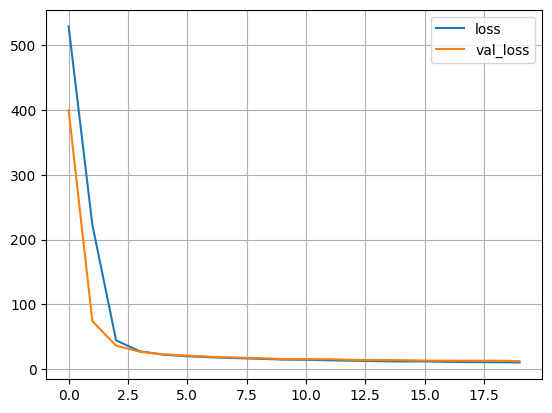

In [ ]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()  #藍色為train loss 橘色為val_loss 每進下一回合都會下降

In [ ]:
#4.Evaluate
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 6ms/step - loss: 22.4225


22.42247772216797

In [ ]:
#5.Predict
model.predict(x_test[:3])

1/1 [==============================] - 0s 115ms/step


array([[ 8.930979],
       [16.611923],
       [21.539871]], dtype=float32)

In [ ]:
y_test[:3]

array([ 7.2, 18.8, 19. ])